<a href="https://colab.research.google.com/github/antoszy/CatCom/blob/main/dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting drive

In [4]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


# Loading data

In [13]:
from pathlib import Path
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

from IPython.display import clear_output

DATA_DIR_NAME = "records_cat"
DATA_FILE_NAME = "rec_b"

data_path = Path("/content/drive/My Drive/catcom")/DATA_DIR_NAME
data_files = data_path.glob(DATA_FILE_NAME+"*")

all_records = np.array([], dtype=np.int)
for data_file in data_files:
  rate, data = wavfile.read(data_file)
  all_records = np.append(all_records, data)

  clear_output()
  print(data_file)
  print(data.shape)
  print(f"rate = {rate}")

clear_output()
print(f"Time of all recoreds is: {all_records.shape[0]/rate} s")
#all_records = all_records[1440000:2*1440000]

Time of all recoreds is: 530.0 s


# Check data

(8480000,)


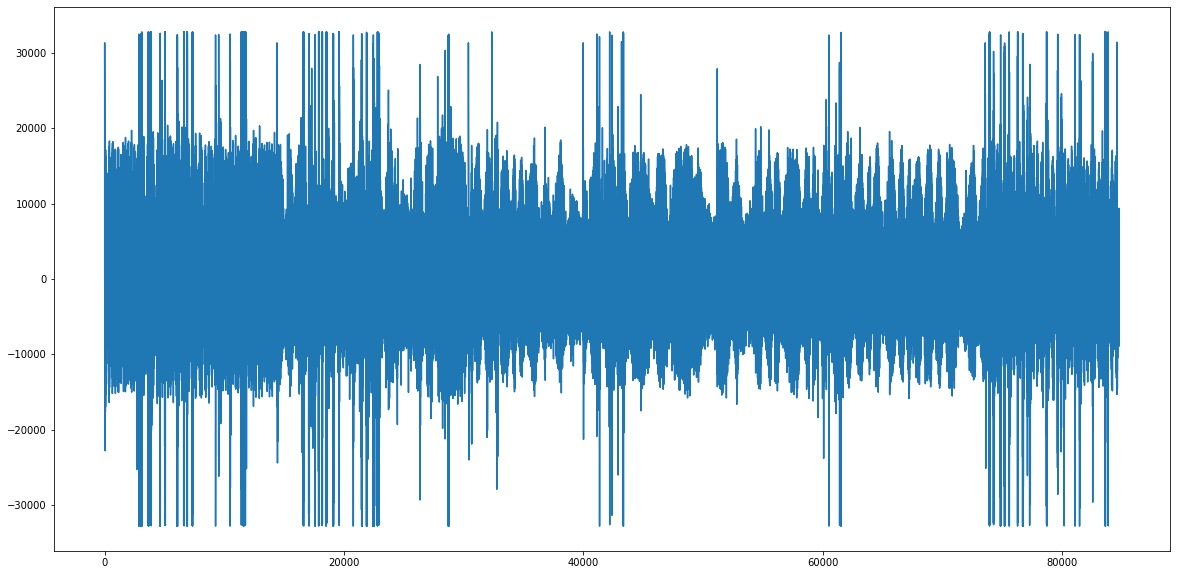

In [14]:
print(all_records.shape)
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(all_records[0::100])

#Running max and spectrogram

In [21]:
import pandas as pd
from scipy import signal
from scipy.fft import fftshift

a = pd.Series(all_records)
rolling_max = a.rolling(window=1000).max()
print(rolling_max.max())
rolling_max_norm = rolling_max / rolling_max.max()
plt.figure(figsize=(19,7))
print(type(rolling_max))
plt.plot(rolling_max_norm)
plt.grid()
plt.yticks(np.arange(0.1,1.1, 0.1))

def draw_spectrogram(data, fs):
  f, t, Sxx = signal.spectrogram(data, fs, window=np.ones(1024))
  plt.figure(figsize=(23,7))
  plt.pcolormesh(t, f, Sxx, shading='gouraud', vmax=1e4)
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.colorbar()

draw_spectrogram(all_records, rate)
#display(Audio(np.array(all_records),rate=rate))

32767.0
<class 'pandas.core.series.Series'>


#Find samples with cat

In [22]:
from IPython.display import Audio
from IPython.display import display

VOLUME_TSH = 0.75
cat_meows = []
cat_meow = []
for idx, sample in enumerate(rolling_max_norm):
  if sample >= VOLUME_TSH:
    cat_meow.append(all_records[idx])
  elif len(cat_meow)> 0:
    if len(cat_meow) > 1024:
      cat_meows.append(cat_meow)
    cat_meow = []

print(len(cat_meows))

for idx, sample in enumerate(cat_meows):
  print(f"Sample number: {idx}")
  display(Audio(np.array(sample),rate=rate))




136
Sample number: 0


Sample number: 1


Sample number: 2


Sample number: 3


Sample number: 4


Sample number: 5


Sample number: 6


Sample number: 7


Sample number: 8


Sample number: 9


Sample number: 10


Sample number: 11


Sample number: 12


Sample number: 13


Sample number: 14


Sample number: 15


Sample number: 16


Sample number: 17


Sample number: 18


Sample number: 19


Sample number: 20


Sample number: 21


Sample number: 22


Sample number: 23


Sample number: 24


Sample number: 25


Sample number: 26


Sample number: 27


Sample number: 28


Sample number: 29


Sample number: 30


Sample number: 31


Sample number: 32


Sample number: 33


Sample number: 34


Sample number: 35


Sample number: 36


Sample number: 37


Sample number: 38


Sample number: 39


Sample number: 40


Sample number: 41


Sample number: 42


Sample number: 43


Sample number: 44


Sample number: 45


Sample number: 46


Sample number: 47


Sample number: 48


Sample number: 49


Sample number: 50


Sample number: 51


Sample number: 52


Sample number: 53


Sample number: 54


Sample number: 55


Sample number: 56


Sample number: 57


Sample number: 58


Sample number: 59


Sample number: 60


Sample number: 61


Sample number: 62


Sample number: 63


Sample number: 64


Sample number: 65


Sample number: 66


Sample number: 67


Sample number: 68


Sample number: 69


Sample number: 70


Sample number: 71


Sample number: 72


Sample number: 73


Sample number: 74


Sample number: 75


Sample number: 76


Sample number: 77


Sample number: 78


Sample number: 79


Sample number: 80


Sample number: 81


Sample number: 82


Sample number: 83


Sample number: 84


Sample number: 85


Sample number: 86


Sample number: 87


Sample number: 88


Sample number: 89


Sample number: 90


Sample number: 91


Sample number: 92


Sample number: 93


Sample number: 94


Sample number: 95


Sample number: 96


Sample number: 97


Sample number: 98


Sample number: 99


Sample number: 100


Sample number: 101


Sample number: 102


Sample number: 103


Sample number: 104


Sample number: 105


Sample number: 106


Sample number: 107


Sample number: 108


Sample number: 109


Sample number: 110


Sample number: 111


Sample number: 112


Sample number: 113


Sample number: 114


Sample number: 115


Sample number: 116


Sample number: 117


Sample number: 118


Sample number: 119


Sample number: 120


Sample number: 121


Sample number: 122


Sample number: 123


Sample number: 124


Sample number: 125


Sample number: 126


Sample number: 127


Sample number: 128


Sample number: 129


Sample number: 130


Sample number: 131


Sample number: 132


Sample number: 133


Sample number: 134


Sample number: 135


int16


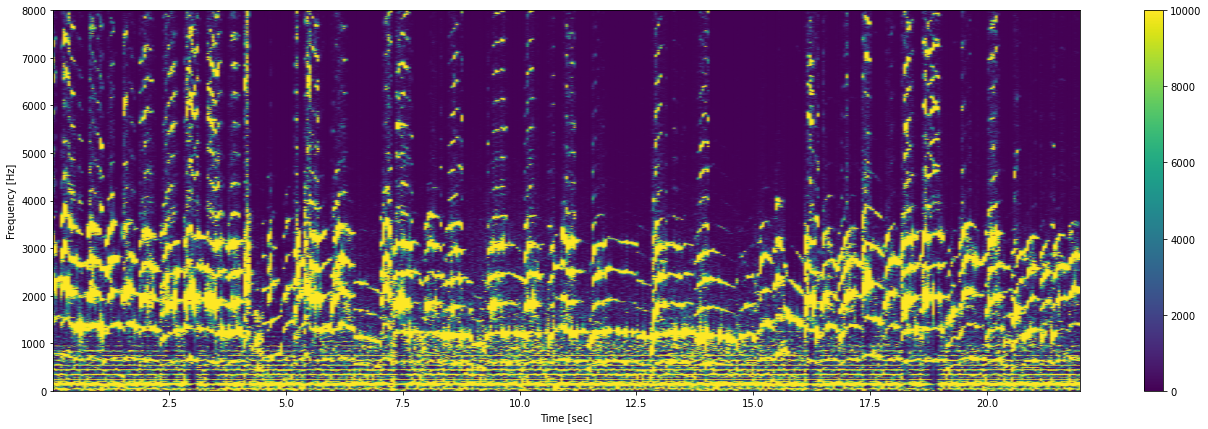

In [31]:
from itertools import chain
import numpy as np
from scipy.io import wavfile

SAMPLE_LENGTH = 1024
cat_samples_idx = set(chain(range(1,17), range(26,57), [58], [65], range(69,71), range(111,125), range(127,130)))
all_meows_record = np.array([sample for idx,rec in enumerate(cat_meows) if idx in cat_samples_idx for sample in rec ])
draw_spectrogram(all_meows_record, rate)
all_meows_record = np.array(all_meows_record).astype(np.int16)
display(Audio(all_meows_record,rate=rate))
sample_num_in_cat_dataset = len(all_meows_record)

print(all_meows_record.dtype)
dataset_path = Path("/content/drive/My Drive/catcom/dataset")
wavfile.write(dataset_path/"positive0.wav", rate, all_meows_record)



# Analize sample

In [10]:
from scipy.fft import fft

def analize_sample(record):
  rec_fft = fft(record)
  plt.figure()
  plt.plot(rec_fft)
